### Author: Mohsen Ghazel (mghazel)
* Date: April 5th, 2021

# **Project: MINIST Handwritten Digits Classification using Artificial Neural Networks (ANN):**

The objective of this project is to demonstrate how to develop a simple artificial neural network to classify images of hand-written digits, from 0-9:

* We shall apply the standard Machine and Deep Learning model development and evaluation process, with the following steps:

  1. Load the MNIST dataset of handwritten digits:
      *       60,000 labelled training examples
      *       10,000 labelled test examples
      *   Each handwritten example is 28x28  pixels binary image.

  2. Build a simple ANN model
  3. Train the selected ML model
  4. Deploy the trained on the test data 
  5. Evaluate the performance of the trained model using evaluation metrics:
    *    Accuracy
    *    Confusion Matrix
    *    Other metrics derived form the confusion matrix.

## **Part 1: Imports and global variables:**


###**1.1) Standard scientific Python imports:**

In [ ]:
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# - import sklearn to use the confusion matrix function
from sklearn.metrics import confusion_matrix
# import itertools
import itertools
# opencv
import cv2
# tensorflow
import tensorflow as tf

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))
# tensorflow
print("Tensorflow version  : {0}".format(tf.__version__))


Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5
Tensorflow version  : 2.4.1


###**1.2) Global variables:**

In [ ]:
# -set the random_state seed = 101 for reproducibilty
random_state_seed = 101

# the number of visualized images
num_visualized_images = 25

##**Part 2: Load MNIST Dataset**
###**2.1) Load the MNIST dataset :**
* Load the MNIST dataset of handwritten digits:
  * 60,000 labelled training examples
  * 10,000 labelled test examples
  * Each handwritten example is 28x28 pixels binary image.

In [ ]:
# Load in the data: MNIST
mnist = tf.keras.datasets.mnist
# mnist.load_data() automatically splits traing and test data sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###**2.2) Explore training and test images:**

####**2.2.1) Display the number and shape of the training and test subsets:**

In [ ]:
#------------------------------------------------------
# Training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])

#------------------------------------------------------
# Test data:
#------------------------------------------------------
# the number of test images
num_test_images = x_test.shape[0]
print("----------------------------------------------")
print("Test data:")
print("----------------------------------------------")
print("x_test.shape: ", x_test.shape)
print("Number of test images: ", num_test_images)
print("Image size: ", x_test.shape[1:])
print("----------------------------------------------")

----------------------------------------------
Training data:
----------------------------------------------
x_train.shape:  (60000, 28, 28)
Number of training images:  60000
Image size:  (28, 28)
----------------------------------------------
Test data:
----------------------------------------------
x_test.shape:  (10000, 28, 28)
Number of test images:  10000
Image size:  (28, 28)
----------------------------------------------


####**2.2.2) Display the targets/classes:**
* The classification of the digits should be: 0 to 9

In [ ]:
print("----------------------------------------------")
print("Classes/labels:")
print("----------------------------------------------")
print('The target labels: ' + str(np.unique(y_train)))
print("----------------------------------------------")

----------------------------------------------
Classes/labels:
----------------------------------------------
The target labels: [0 1 2 3 4 5 6 7 8 9]
----------------------------------------------


####**2.2.3) Examine the number of images for each class of the training and testing subsets:**

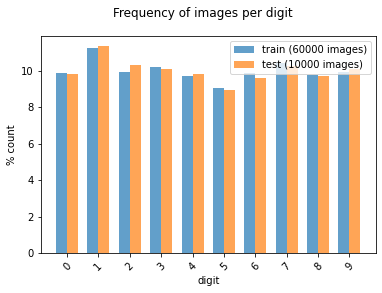

In [ ]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} images)'.format(len(y_train)), 
    'test ({0} images)'.format(len(y_test)), 
]);

####**2.2.4) Visualize some of the training and test  images and their associated targets:**

* First implement a visualization functionality to visualize the number of randomly selected images:

In [ ]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = x_train[counter,:]
          # get the target associated with the image
          label = y_train[counter]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = x_test[counter,:]
          # get the target associated with the image
          label = y_test[counter]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title('y =' + str(label), size = 8)

#####**2.2.4.1) Visualize some of the training images and their associated targets:**

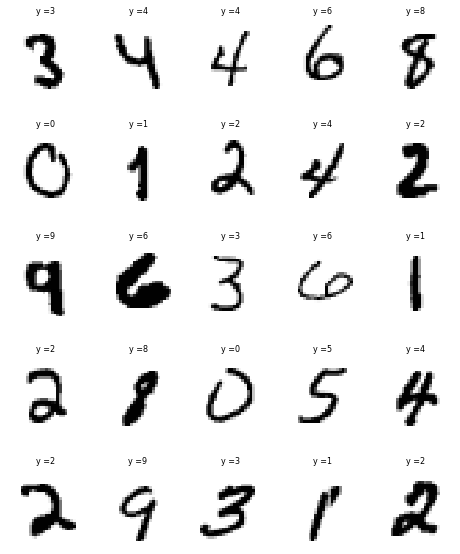

In [ ]:
# call the function to visualize the training images
visualize_images_and_labels(num_visualized_images, 1)

#####**2.2.4.2) Visualize some of the test images and their associated targets:**

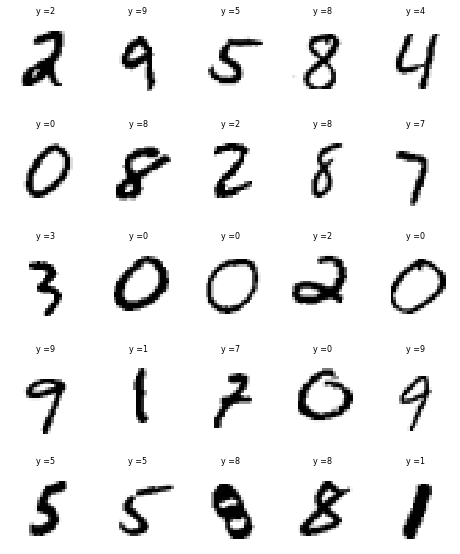

In [ ]:
# call the function to visualize the test images
visualize_images_and_labels(num_visualized_images, 2)

###**2.3) Normalize the training and test images to the interval: [0, 1]:**

In [ ]:
# Normalize the training images
x_train = x_train / 255.0
# Normalize the test images
x_test = x_test / 255.0

##**Part 3: Develop the ANN model architecture**
* Develop the structure of the ANN model to classify the MINIST images.

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
  #-----------------------------------------------------------------------------
  # Input layer: 
  #-----------------------------------------------------------------------------
  # - Input images size: (28,28) grayscale images
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  #-----------------------------------------------------------------------------
  # Layer # 1: 
  #-----------------------------------------------------------------------------
  # - 128 neurons
  # -  relu activation function 
  #-----------------------------------------------------------------------------
  tf.keras.layers.Dense(128, activation='relu'), 
  #-----------------------------------------------------------------------------
  # Layer # 2: 
  #-----------------------------------------------------------------------------
  # Dropout layer wit: p = 0.2
  tf.keras.layers.Dropout(0.2), 
  #-----------------------------------------------------------------------------
  # Output layer: 
  #-----------------------------------------------------------------------------
  #  - 10 classes (0 - 9)
  #  - activation function for multi-class classification: softwax
  #-----------------------------------------------------------------------------
  tf.keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##**Part 4: Compile the ANN model**
* Compile the ANN model, developed above

In [ ]:
# Compile the ANN model
model.compile(optimizer='adam', # the optimizer: Gradient descent version (adam vs. SGD, etc.)
              loss='sparse_categorical_crossentropy', # use for multi-class classification models
              metrics=['accuracy']) # performance evaluation metric

##**Part 5: Train/Fit the model**
* Start training the compiled ANN model.

In [ ]:
# Train the model
# - Train for 100 epochs:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7302 - accuracy: 0.5456 - val_loss: 0.6326 - val_accuracy: 0.8480
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6060 - accuracy: 0.8383 - val_loss: 0.4226 - val_accuracy: 0.8902
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4503 - accuracy: 0.8726 - val_loss: 0.3552 - val_accuracy: 0.9023
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3936 - accuracy: 0.8865 - val_loss: 0.3196 - val_accuracy: 0.9105
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3599 - accuracy: 0.8956 - val_loss: 0.2979 - val_accuracy: 0.9142
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.9035 - val_loss: 0.2805 - val_accuracy: 0.9188
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3071 - accuracy: 0.9103 - val_loss: 0.2645 - val_ac

##**Part 5: Evaluate the model**
* Evaluate the trained ANN model on the test data using different evaluation metrics:
   * Loss function
   * Accuracy
   * Confusion matrix.

###**5.1) Loss function:**
* Display the variations of the training and validation loss function with the number of epochs:

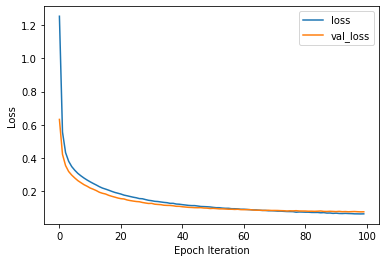

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();
plt.xlabel('Epoch Iteration');
plt.ylabel('Loss');

###**5.2) Accuracy:**
* Display the variations of the training and validation accuracy with the number of epochs:

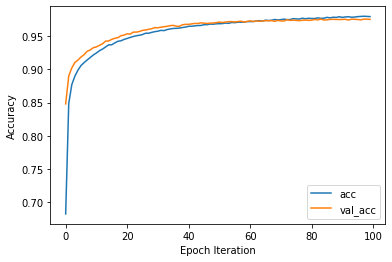

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc');
plt.plot(r.history['val_accuracy'], label='val_acc');
plt.legend();
plt.xlabel('Epoch Iteration');
plt.ylabel('Accuracy');

In [ ]:
# Compute the model accuracy on the test data
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9755
[0.07720769196748734, 0.9754999876022339]


###**5.3) Confusion Matrix Visualizations:**
* Compute the confusion matrix

Confusion matrix, without normalization
[[ 970    0    1    1    0    1    4    1    2    0]
 [   0 1123    3    2    0    1    2    1    3    0]
 [   6    1 1005    3    2    0    2    6    6    1]
 [   0    0    4  989    1    4    0    7    3    2]
 [   1    0    2    0  953    0    9    4    1   12]
 [   2    1    0    8    1  865    6    2    5    2]
 [   5    3    0    1    2    5  940    0    2    0]
 [   1    8    9    3    0    1    0  998    0    8]
 [   4    2    5    4    5    6    1    6  939    2]
 [   2    5    0    7   11    3    0    7    1  973]]


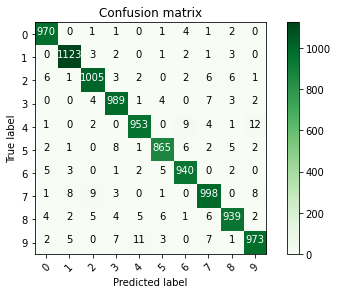

In [ ]:
#-------------------------------------------------------------------------------
# Compute the confusion matrix
#-------------------------------------------------------------------------------
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  # Display the confusuon matrix
  print(cm)
  # display the confusion matrix
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

#-------------------------------------------------------------------------------
# Predict the targets for the test data
#-------------------------------------------------------------------------------
p_test = model.predict(x_test).argmax(axis=1)
# construct the confusion matrix
cm = confusion_matrix(y_test, p_test)
# plot the confusion matrix
plot_confusion_matrix(cm, list(range(10)), False, 'Confusion matrix', plt.cm.Greens)

#-------------------------------------------------------------------------------
# Do these results make sense?
#-------------------------------------------------------------------------------
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

###**5.4) Examine some of the misclassified digits:**
*   Display some of the misclassified digits

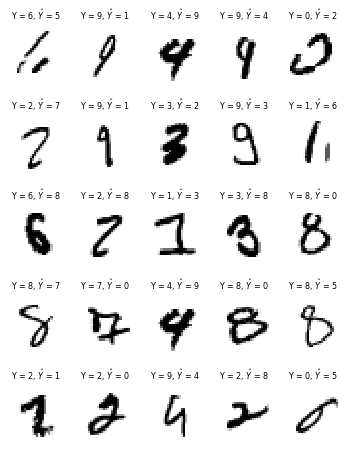

In [ ]:
# - Find the indices of all the mis-classified examples
misclassified_idx = np.where(p_test != y_test)[0] # select the index
# setup the subplot grid for the visualized images
 # the suplot grid shape
num_rows = 5
# the number of columns
num_cols = num_visualized_images // num_rows
# setup the subplots axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6, 8))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the sub-plots
for row in range(num_rows):
  for col in range(num_cols):
    # get the next figure axis
    ax = axes[row, col];
    # turn-off subplot axis
    ax.set_axis_off()
    # select a random mis-classified example
    counter = np.random.choice(misclassified_idx)
    # get test image 
    image = x_test[counter,:]
    # get the true labels of the selected image
    label = y_test[counter]
    # get the predicted label of the test image
    yhat = p_test[counter]
    # display the image 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display the true and predicted labels on the title of teh image
    ax.set_title('Y = %i, $\hat{Y}$ = %i' % (int(label), int(yhat)), size = 8)

##**Part 6: Display a final message after successful execution completion:**

In [ ]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-05 19:42:07...Goodbye!

